In [ ]:
import keras

# Cargar el conjunto de datos MNIST
mnist = keras.datasets.mnist
# Cargue la división de entrenamiento y prueba del conjunto de datos MNIST
(training_images, training_labels),(test_images,test_labels) = mnist.load_data()

In [ ]:
training_labels.shape

(60000,)

Label:5
Image:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

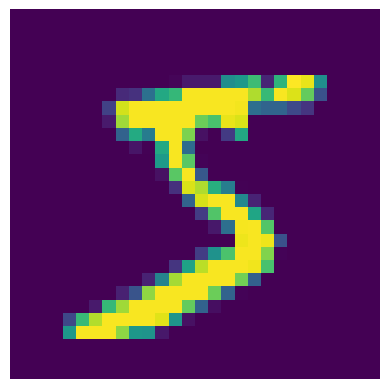

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

index = 0

np.set_printoptions(linewidth=320)
print(f'Label:{training_labels[index]}')
print(f'Image:\n {training_images[index]}')
plt.imshow(training_images[index])
plt.axis('off')
plt.show()

In [ ]:
training_images = training_images / 255.0
test_images = test_images / 255.0

In [ ]:
model = keras.models.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                                 keras.layers.Dense(128, activation='relu'),
                                 keras.layers.Dense(10, activation='softmax')])

In [ ]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2633 - accuracy: 0.9254
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1106 - accuracy: 0.9675
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0748 - accuracy: 0.9777
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0579 - accuracy: 0.9826
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0438 - accuracy: 0.9866
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0346 - accuracy: 0.9893
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0279 - accuracy: 0.9914
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0218 - accuracy: 0.9935
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0185 - accuracy: 0.9942
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0

<Axes: >

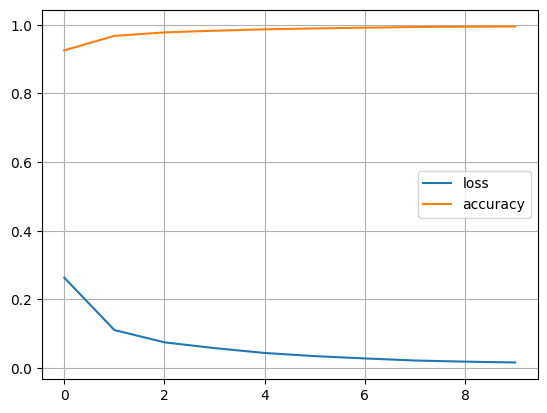

In [ ]:
pd.DataFrame(history.history).plot(grid=True)

In [ ]:
loss, accuracy = model.evaluate(training_images, training_labels)
print('Pérdida en el conjunto de prueba:', loss)
print('Precisión en el conjunto de pruba:', accuracy)

loss, accuracy = model.evaluate(test_images, test_labels)
print('Pérdida en el conjunto de prueba:', loss)
print('Precisión en el conjunto de pruba:', accuracy)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0094 - accuracy: 0.9974
Pérdida en el conjunto de prueba: 0.009441412054002285
Precisión en el conjunto de pruba: 0.9973666667938232
313/313 [==============================] - 1s 3ms/step - loss: 0.0721 - accuracy: 0.9814
Pérdida en el conjunto de prueba: 0.0720863938331604
Precisión en el conjunto de pruba: 0.9814000129699707


In [ ]:
pred_images = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
pred_labels= pred_images.argmax(axis=1)

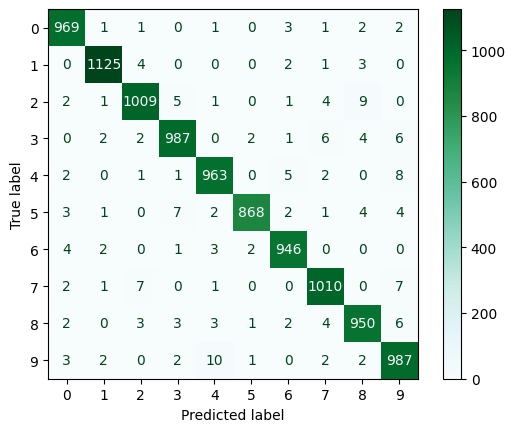

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cfm = confusion_matrix(test_labels, pred_labels)
ConfusionMatrixDisplay(cfm).plot(cmap='BuGn')
plt.show()

In [ ]:
cl_rp = classification_report(test_labels, pred_labels)
print(cl_rp)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



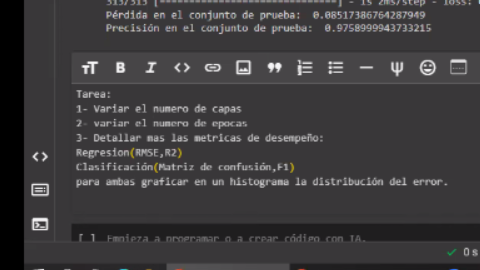